#  Proceso de an√°lisis de datos con metodolog√≠a CRISP-DM

### FASE 1. Comprensi√≥n del negocio
- Identificar y comprender los factores clave que contribuyen a la alta valoraci√≥n econ√≥mica de los 100 clubes de f√∫tbol m√°s valiosos del mundo, explorando la relaci√≥n entre las ligas a las que pertenecen, la edad promedio de sus planteles, la cantidad de jugadores, el valor total del plantel y la concentraci√≥n del valor en sus jugadores m√°s caros

### FASE 2. Comprensi√≥n de los datos. 

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbl
import re
import csv
import sklearn
import seaborn as sns
import io
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings

In [182]:
data = pd.read_csv('equipos-de-futbol.csv')
# print(data.head()) # primeras 5 filas del csv

In [183]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Club                     100 non-null    object 
 1   Competition              100 non-null    object 
 2   Age                      100 non-null    float64
 3   Squad_size               100 non-null    int64  
 4   Market_value             100 non-null    object 
 5   Market_value_of_players  100 non-null    object 
 6   MV_Top_18_players        100 non-null    object 
 7   Share_of_MV              100 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 6.4+ KB
None


In [184]:
print(data.describe())

             Age  Squad_size
count  100.00000   100.00000
mean    26.30800    27.54000
std      1.39499     2.87244
min     23.10000    21.00000
25%     25.40000    26.00000
50%     26.25000    27.00000
75%     27.42500    29.00000
max     29.90000    35.00000


In [185]:
print(len(data))

100


In [186]:
def basic_data_quality_check(data):
    """
    Pruebas b√°sicas de calidad de datos
    """
    print("=== PRUEBAS B√ÅSICAS DE CALIDAD DE DATOS ===")
    
    # 1. Informaci√≥n general
    print(f"1. Dimensiones: {data.shape}")
    print(f"2. Tipos de datos:\n{data.dtypes}")
    
    # 3. colum_valuees faltantes
    print(f"\n3. colum_valueES FALTANTES:")
    missing_data = data.isnull().sum()
    missing_percent = (missing_data / len(data)) * 100
    missing_info = pd.DataFrame({
        'colum_valuees_Faltantes': missing_data,
        'Porcentaje': missing_percent
    })
    print(missing_info[missing_info['colum_valuees_Faltantes'] > 0])
    
    # 4. colum_valuees duplicados
    print(f"\n4. FILAS DUPLICADAS:")
    duplicates = data.duplicated().sum()
    print(f"   Total duplicados: {duplicates}")
    print(f"   Porcentaje duplicados: {(duplicates/len(data))*100:.2f}%")
    
    # 5. colum_valuees √∫nicos por column_name
    print(f"\n5. colum_valueES √öNICOS POR column_name:")
    for col in data.columns:
        unique_count = data[col].nunique()
        print(f"   {col}: {unique_count} colum_valuees √∫nicos")
    
    return {
        'dimensions': data.shape,
        'missing_data': missing_info,
        'duplicates': duplicates,
        'unique_counts': {col: data[col].nunique() for col in data.columns}
    }

# Uso
data = pd.read_csv('equipos-de-futbol.csv')
display(data)
results = basic_data_quality_check(data)

Club     Competition   Age  Squad_size Market_value  \
0          Manchester City  Premier League  27.2          23      ‚Ç¨1.05bn   
1      Paris Saint-Germain         Ligue 1  26.1          35     ‚Ç¨997.75m   
2        Manchester United  Premier League  28.0          28     ‚Ç¨937.25m   
3               Chelsea FC  Premier League  26.8          27     ‚Ç¨882.50m   
4             Liverpool FC  Premier League  27.0          27     ‚Ç¨879.50m   
..                     ...             ...   ...         ...          ...   
95  Clube Atl√©tico Mineiro         S√©rie A  26.9          31      ‚Ç¨98.45m   
96             FC Augsburg      Bundesliga  26.1          28      ‚Ç¨97.10m   
97        Lokomotiv Moscow    Premier Liga  24.8          29      ‚Ç¨97.03m   
98             Trabzonspor       S√ºper Lig  26.7          29      ‚Ç¨96.30m   
99              CA Osasuna          LaLiga  27.7          27      ‚Ç¨93.50m   

   Market_value_of_players MV_Top_18_players Share_of_MV  
0                  ‚Ç¨45.75m          ‚Ç¨988.00m      93.9 %  
1                  ‚Ç¨28.51m          ‚Ç¨889.00m      89.1 %  
2                  ‚Ç¨33.47m          ‚Ç¨850.00m      90.7 %  
3                  ‚Ç¨32.69m          ‚Ç¨816.00m      92.5 %  
4                  ‚Ç¨32.57m          ‚Ç¨810.50m      92.2 %  
..                     ...               ...         ...  
95                  ‚Ç¨3.18m           ‚Ç¨84.95m      86.3 %  
96                  ‚Ç¨3.47m           ‚Ç¨88.00m      90.6 %  
97                  ‚Ç¨3.35m           ‚Ç¨86.50m      89.2 %  
98                  ‚Ç¨3.32m           ‚Ç¨89.00m      92.4 %  
99                  ‚Ç¨3.46m           ‚Ç¨86.60m      92.6 %  

[100 rows x 8 columns]

=== PRUEBAS B√ÅSICAS DE CALIDAD DE DATOS ===
1. Dimensiones: (100, 8)
2. Tipos de datos:
Club                        object
Competition                 object
Age                        float64
Squad_size                   int64
Market_value                object
Market_value_of_players     object
MV_Top_18_players           object
Share_of_MV                 object
dtype: object

3. colum_valueES FALTANTES:
Empty DataFrame
Columns: [colum_valuees_Faltantes, Porcentaje]
Index: []

4. FILAS DUPLICADAS:
   Total duplicados: 0
   Porcentaje duplicados: 0.00%

5. colum_valueES √öNICOS POR column_name:
   Club: 100 colum_valuees √∫nicos
   Competition: 16 colum_valuees √∫nicos
   Age: 46 colum_valuees √∫nicos
   Squad_size: 15 colum_valuees √∫nicos
   Market_value: 99 colum_valuees √∫nicos
   Market_value_of_players: 94 colum_valuees √∫nicos
   MV_Top_18_players: 99 colum_valuees √∫nicos
   Share_of_MV: 65 colum_valuees √∫nicos


#### Normalizaci√≥n de los datos

### FASE 3. Preparaci√≥n de los datos. 

In [187]:
map_data_column_names = [ "Market_value", "Market_value_of_players", "MV_Top_18_players", "Share_of_MV" ]

# Leer datos
def convert_column_value(colum_value):
        if pd.isna(colum_value) or colum_value == '':
            return np.nan
        
        colum_value_str = str(colum_value).strip().lower()
        
        # Remover s√≠mbolos de moneda y espacios
        colum_value_str = re.sub(r'[\$‚Ç¨¬£¬•bnm%, ]', '', colum_value_str)
        
        # Buscar multiplicadores (bn, %)
        multiplicador = 1
        if colum_value.endswith('bn'):
            multiplicador = 1000
            colum_value_str = float(colum_value_str) * 1000
        elif colum_value.endswith('%'):
            divisor = 100 
            colum_value_str = float(colum_value_str) / divisor

        try:
            number = float(colum_value_str)
            return number
        except ValueError:
            return np.nan
            
def clean_column_values(data, columns):
    data_converter = data.copy()
    for i in range(len(columns)):
        column_name = columns[i]
        data_converter = data_converter.drop(columns=[column_name])
        data_converter[f'{column_name}'] = data[column_name].apply(convert_column_value)
        
    
    return data_converter

# Uso
data = clean_column_values(data, map_data_column_names)
display(data)

Club     Competition   Age  Squad_size  Market_value  \
0          Manchester City  Premier League  27.2          23       1050.00   
1      Paris Saint-Germain         Ligue 1  26.1          35        997.75   
2        Manchester United  Premier League  28.0          28        937.25   
3               Chelsea FC  Premier League  26.8          27        882.50   
4             Liverpool FC  Premier League  27.0          27        879.50   
..                     ...             ...   ...         ...           ...   
95  Clube Atl√©tico Mineiro         S√©rie A  26.9          31         98.45   
96             FC Augsburg      Bundesliga  26.1          28         97.10   
97        Lokomotiv Moscow    Premier Liga  24.8          29         97.03   
98             Trabzonspor       S√ºper Lig  26.7          29         96.30   
99              CA Osasuna          LaLiga  27.7          27         93.50   

    Market_value_of_players  MV_Top_18_players  Share_of_MV  
0                     45.75             988.00        0.939  
1                     28.51             889.00        0.891  
2                     33.47             850.00        0.907  
3                     32.69             816.00        0.925  
4                     32.57             810.50        0.922  
..                      ...                ...          ...  
95                     3.18              84.95        0.863  
96                     3.47              88.00        0.906  
97                     3.35              86.50        0.892  
98                     3.32              89.00        0.924  
99                     3.46              86.60        0.926  

[100 rows x 8 columns]

In [188]:
print(data.info())
print("\n")
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Club                     100 non-null    object 
 1   Competition              100 non-null    object 
 2   Age                      100 non-null    float64
 3   Squad_size               100 non-null    int64  
 4   Market_value             100 non-null    float64
 5   Market_value_of_players  100 non-null    float64
 6   MV_Top_18_players        100 non-null    float64
 7   Share_of_MV              100 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 6.4+ KB
None


             Age  Squad_size  Market_value  Market_value_of_players  \
count  100.00000   100.00000     100.00000               100.000000   
mean    26.30800    27.54000     292.69270                10.852200   
std      1.39499     2.87244     230.95511                 8.848602   
min 

#### Exportar data normalizada

In [189]:
file_name = "equipos-de-futbol-normalizado.csv"
data.to_csv(file_name, index=False, encoding='utf-8')

print(f"El archivo '{file_name}' ha sido generado exitosamente.")

El archivo 'equipos-de-futbol-normalizado.csv' ha sido generado exitosamente.


### Medidas de tendencia central
- Media
- Mediana
- Moda

### Diagrama de barras para datos no n√∫mericos

Categorical columns found: ['Competition']


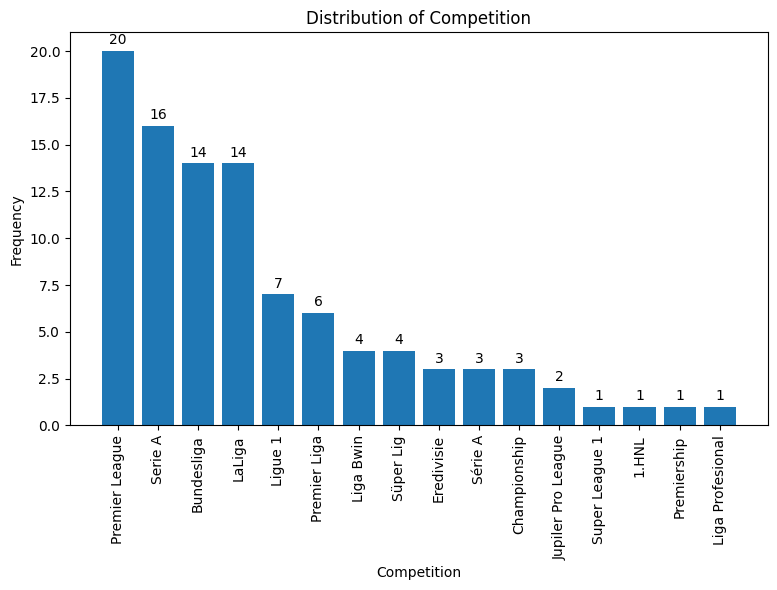

In [190]:
def basic_categorical_bar_graph(data, categorical_columns):
    """
    Create bar charts for categorical columns
    """
    print(f"Categorical columns found: {list(categorical_columns)}")
    
    n_cols = len(categorical_columns)
    
    # Calculate number of rows needed (2 histograms per row)
    n_rows = (n_cols + 1) // 2 
    
    # Create subplots with 2 columns per row
    fig, axes = plt.subplots(n_rows, 2, figsize=(15, 6 * n_rows))
    
    # Handle single subplot case
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Flatten axes for easier iteration
    axes_flat = axes.flatten()
    
    for i, column_name in enumerate(categorical_columns):
        frequencies = data[column_name].value_counts()
        
        # Create bar chart
        axes_flat[i].bar(range(len(frequencies)), frequencies.values)
        axes_flat[i].set_title(f'Distribution of {column_name}')
        axes_flat[i].set_xlabel(column_name)
        axes_flat[i].set_ylabel('Frequency')
        axes_flat[i].set_xticks(range(len(frequencies)))
        axes_flat[i].set_xticklabels(frequencies.index, rotation=90)
        
        # Add values on top of bars
        for j, v in enumerate(frequencies.values):
            axes_flat[i].text(j, v + max(frequencies.values) * 0.01, str(v), 
                             ha='center', va='bottom')
    
    # Hide empty subplots if any
    for i in range(len(categorical_columns), len(axes_flat)):
        axes_flat[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Usage example
basic_categorical_bar_graph(data, ["Competition"])

### histogramas para datos n√∫merico
- Media. Valor promedio de los datos
- Moda. Dato que m√°s se repite
- Desviaci√≥n estandar. Qu√© tan disperso est√°n los datos de su media
    - Baja desviaci√≥n. Datos agrupados cerca de la media. Datos confiables 
    - Alta desviaci√≥n. Datos muy dispersos. Datos poco confiables

Numerical columns found: ['Age', 'Squad_size', 'Market_value', 'Market_value_of_players', 'MV_Top_18_players']


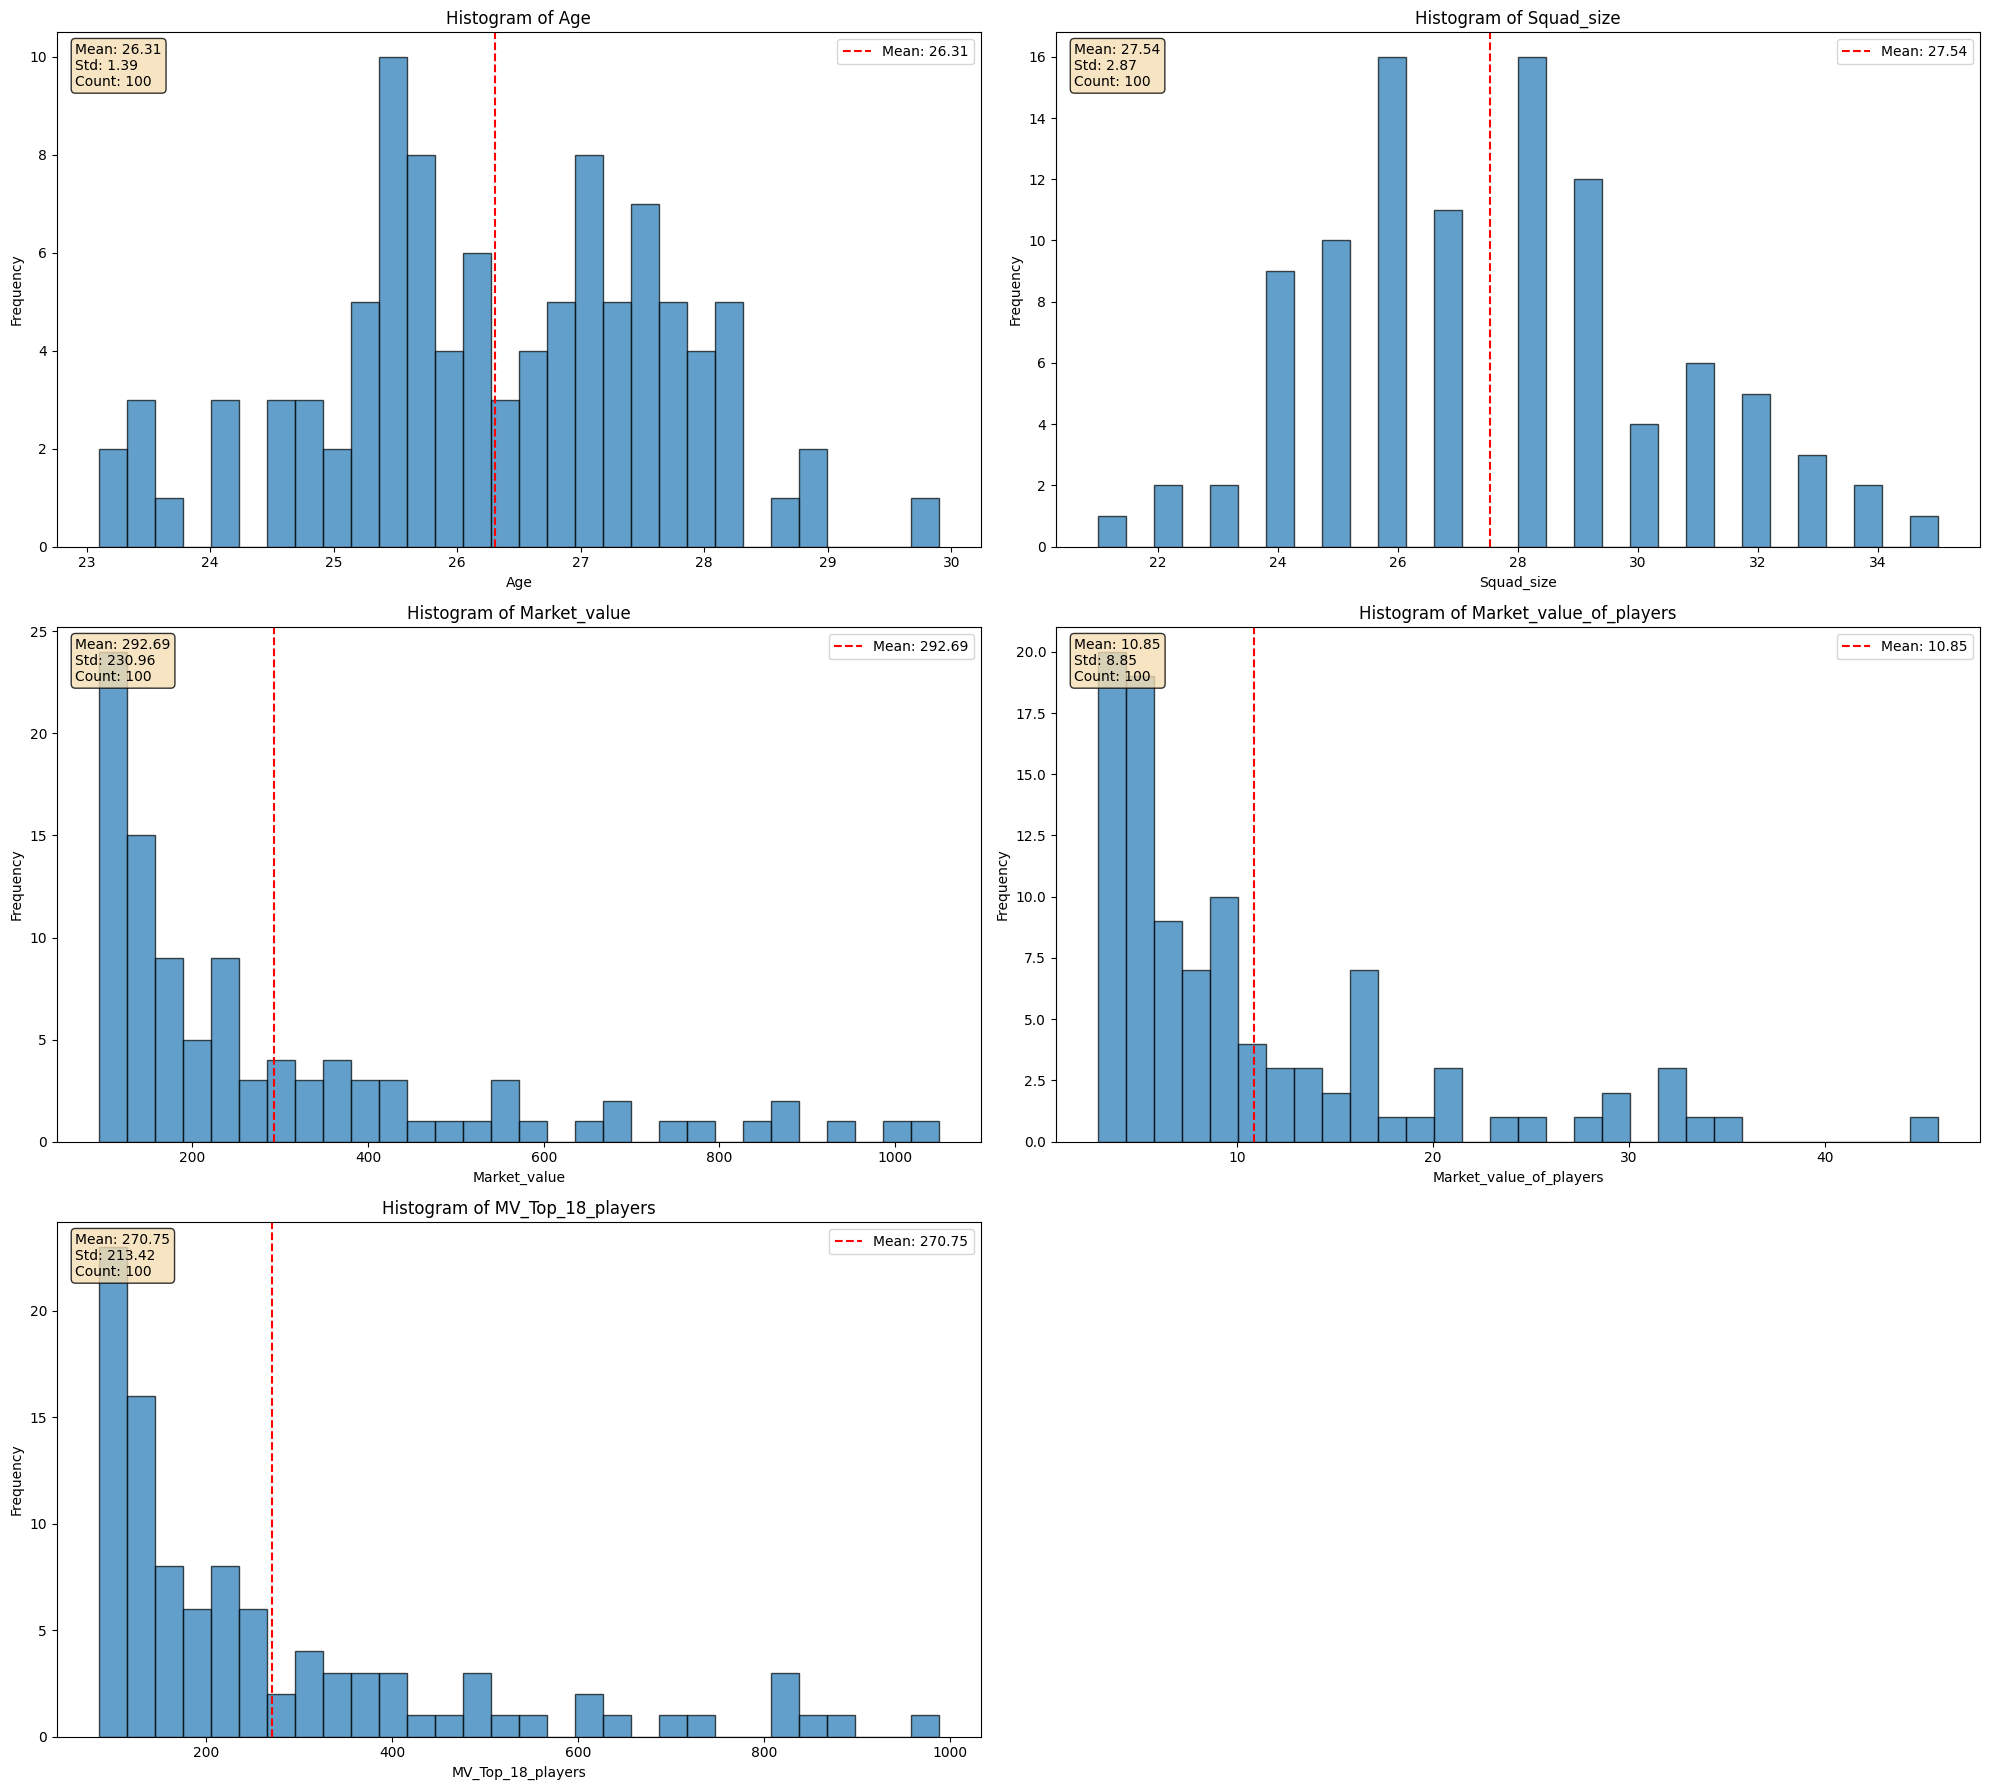

In [191]:
import matplotlib.pyplot as plt
import numpy as np

def basic_numerical_histograms(data, numerical_columns):
    """
    Create histograms for numerical columns
    """
    print(f"Numerical columns found: {list(numerical_columns)}")
    
    n_cols = len(numerical_columns)
    
    # Calculate number of rows needed (2 histograms per row)
    n_rows = (n_cols + 1) // 2  # Ceiling division to ensure we have enough rows
    
    # Create subplots with 2 columns per row
    fig, axes = plt.subplots(n_rows, 2, figsize=(20, 6 * n_rows))
    
    # Handle single subplot case
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Flatten axes for easier iteration
    axes_flat = axes.flatten()
    
    for i, column_name in enumerate(numerical_columns):
        # Get numerical data, removing NaN values
        numerical_data = data[column_name].dropna()
        
        # Create histogram
        axes_flat[i].hist(numerical_data, bins=30, edgecolor='black', alpha=0.7)
        axes_flat[i].set_title(f'Histogram of {column_name}')
        axes_flat[i].set_xlabel(column_name)
        axes_flat[i].set_ylabel('Frequency')
        
        # Add statistics as text
        mean_val = numerical_data.mean()
        std_val = numerical_data.std()
        axes_flat[i].axvline(mean_val, color='red', linestyle='--', 
                            label=f'Mean: {mean_val:.2f}')
        axes_flat[i].legend()
        
        # Add text with statistics
        stats_text = f'Mean: {mean_val:.2f}\nStd: {std_val:.2f}\nCount: {len(numerical_data)}'
        axes_flat[i].text(0.02, 0.98, stats_text, transform=axes_flat[i].transAxes,
                          verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # Hide empty subplots if any
    for i in range(len(numerical_columns), len(axes_flat)):
        axes_flat[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

basic_numerical_histograms(data, ["Age", "Squad_size", "Market_value", "Market_value_of_players", "MV_Top_18_players"])

### Outliers 
- Diagrama de cajas y bigotes. Los outliers son valores que se desv√≠an significativamente del patr√≥n general de los datos. Son observaciones que est√°n "fuera de lugar" respecto al resto de la distribuci√≥n.

/var/folders/fq/6vkst89d5550c5mvxvvytqh80000gn/T/ipykernel_84726/2904890415.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data[col].dropna() for col in columns_numericas],


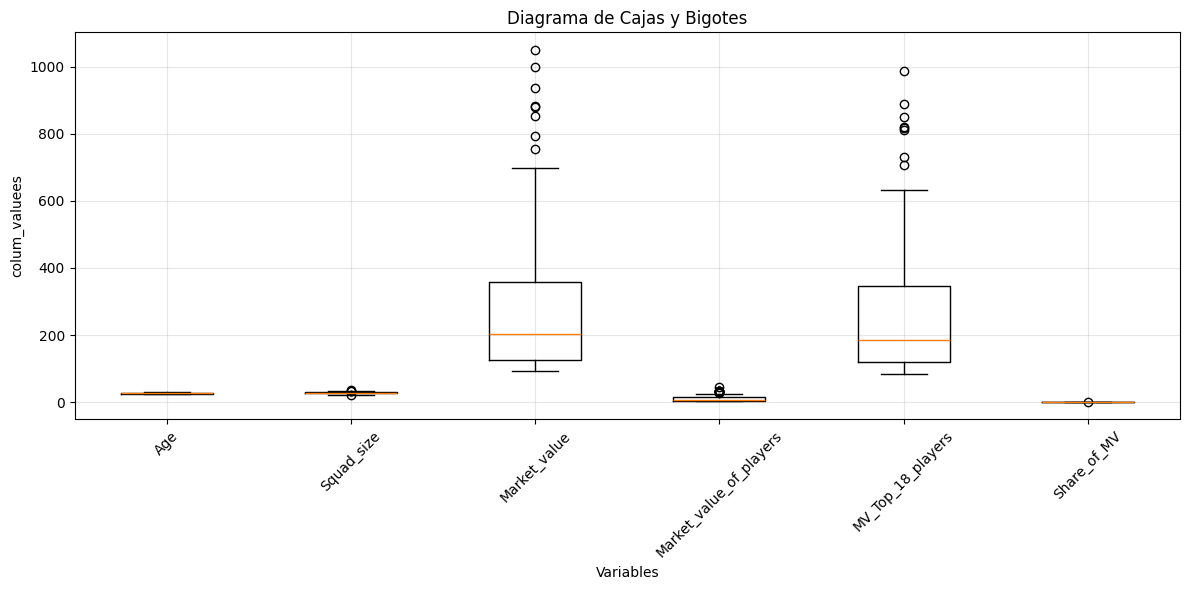

In [192]:
def boxplot_matplotlib(data):
    """
    Crear diagrama de cajas y bigotes con matplotlib
    """
    # Seleccionar columns num√©ricas
    columns_numericas = data.select_dtypes(include=[np.number]).columns
    
    # Crear figura
    plt.figure(figsize=(12, 6))
    
    # Crear boxplot
    plt.boxplot([data[col].dropna() for col in columns_numericas], 
                labels=columns_numericas)
    
    plt.title('Diagrama de Cajas y Bigotes')
    plt.ylabel('colum_valuees')
    plt.xlabel('Variables')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Uso
boxplot_matplotlib(data)

Numerical columns found: ['Age', 'Squad_size', 'Market_value', 'Market_value_of_players', 'MV_Top_18_players']


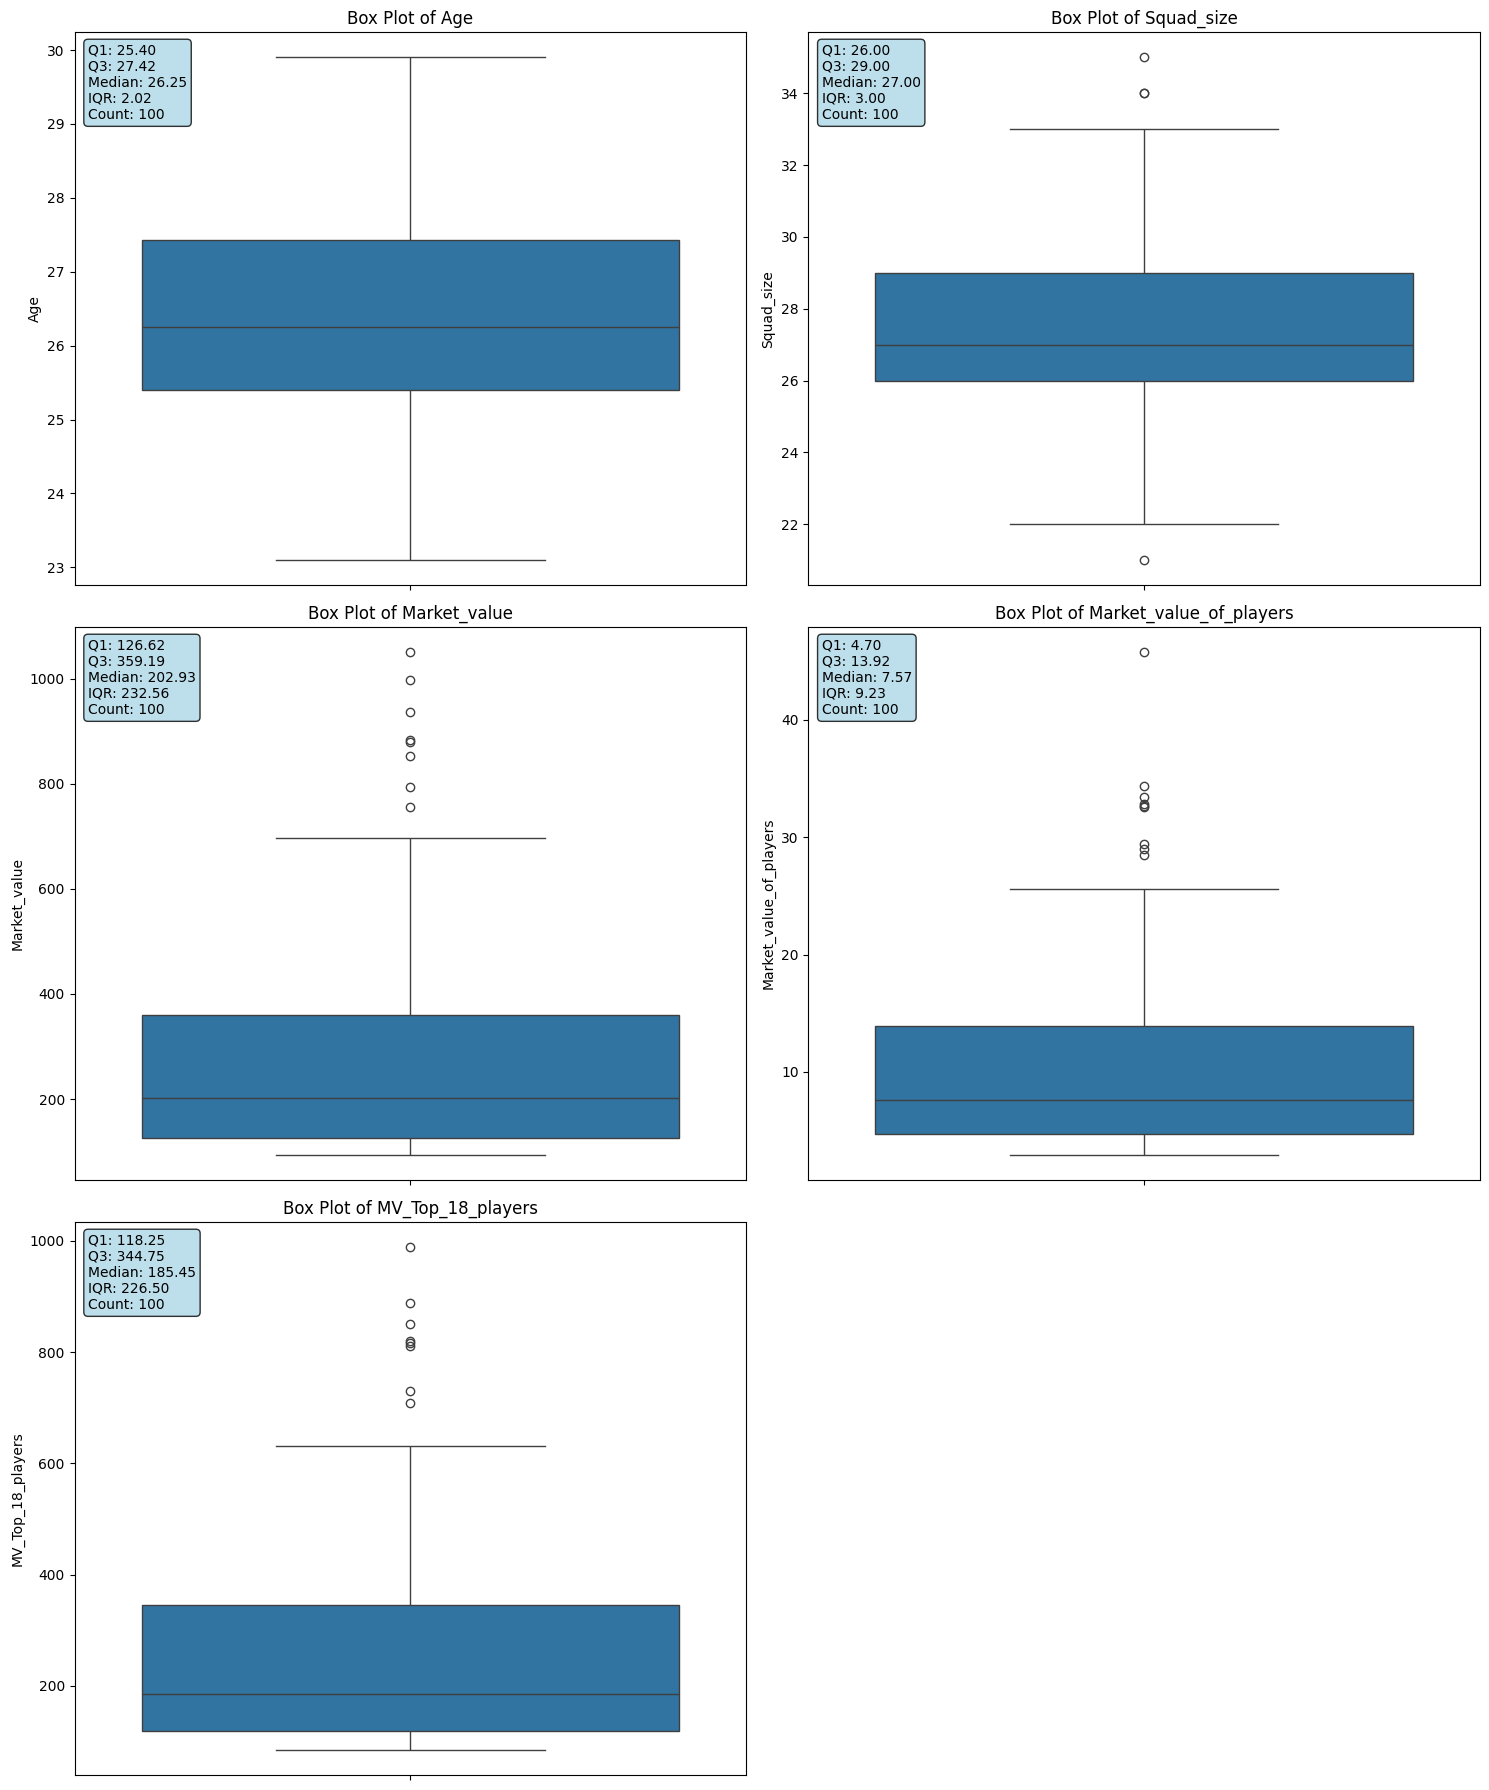

In [193]:
def basic_numerical_boxplots(data, numerical_columns):
    """
    Create box plots for numerical columns
    """
    print(f"Numerical columns found: {list(numerical_columns)}")
    
    n_cols = len(numerical_columns)
    
    # Calculate number of rows needed (2 box plots per row)
    n_rows = (n_cols + 1) // 2  # Ceiling division to ensure we have enough rows
    
    # Create subplots with 2 columns per row
    fig, axes = plt.subplots(n_rows, 2, figsize=(15, 6 * n_rows))
    
    # Handle single subplot case
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    
    # Flatten axes for easier iteration
    axes_flat = axes.flatten()
    
    for i, column_name in enumerate(numerical_columns):
        # Get numerical data, removing NaN values
        numerical_data = data[column_name].dropna()
        
        # Create box plot
        sbl.boxplot(data=numerical_data, ax=axes_flat[i])
        axes_flat[i].set_title(f'Box Plot of {column_name}')
        axes_flat[i].set_ylabel(column_name)
        
        # Add statistics as text
        q1 = numerical_data.quantile(0.25)
        q3 = numerical_data.quantile(0.75)
        median = numerical_data.median()
        iqr = q3 - q1
        
        stats_text = f'Q1: {q1:.2f}\nQ3: {q3:.2f}\nMedian: {median:.2f}\nIQR: {iqr:.2f}\nCount: {len(numerical_data)}'
        axes_flat[i].text(0.02, 0.98, stats_text, transform=axes_flat[i].transAxes,
                          verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    
    # Hide empty subplots if any
    for i in range(len(numerical_columns), len(axes_flat)):
        axes_flat[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

basic_numerical_boxplots(data, ["Age", "Squad_size", "Market_value", "Market_value_of_players", "MV_Top_18_players"])


### Matriz de Correlaci√≥n:


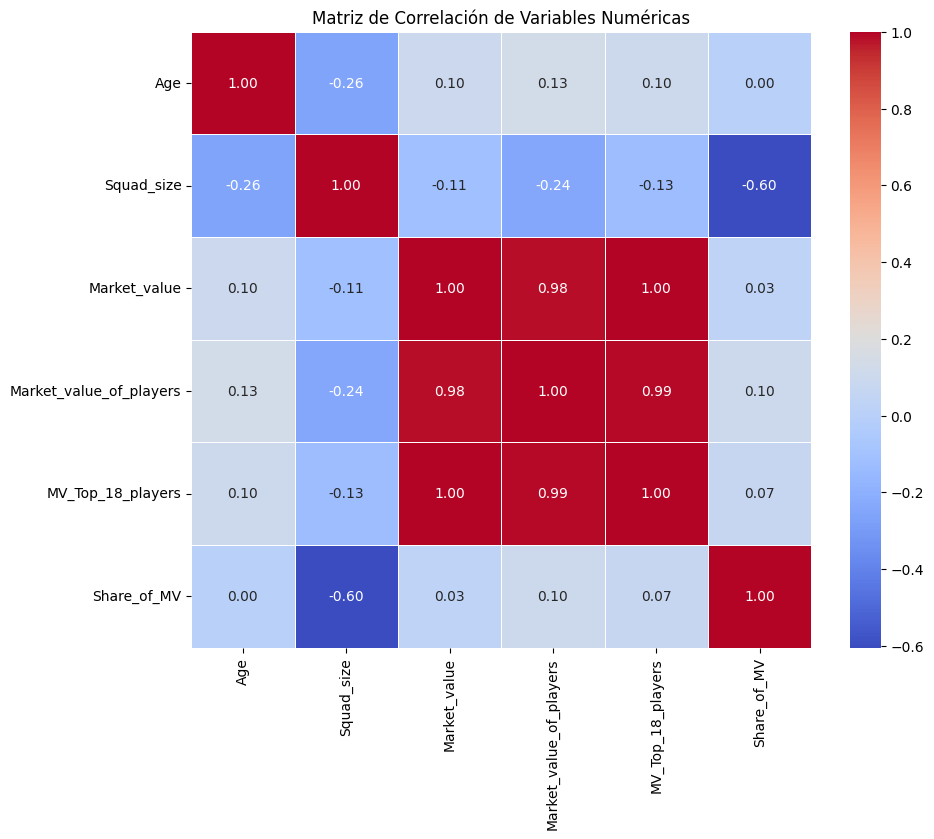

In [194]:
# Matriz de correlaci√≥n
numeric_cols = ['Age', 'Squad_size', 'Market_value', 'Market_value_of_players', 'MV_Top_18_players', 'Share_of_MV']
correlation_matrix = data[numeric_cols].corr()

print("\n### Matriz de Correlaci√≥n:")

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlaci√≥n de Variables Num√©ricas')
plt.show()

#### FASE 4. Modelado de los datos 
- Aplicar t√©cnicas de an√°lisis estad√≠stico, segmentaci√≥n o aprendizaje autom√°tico si corresponde.
### FASE 5. Evaluaci√≥n de los datos 
- Evaluar la calidad del modelo y comprobar si responde al problema de negocio.
##### Objetivo 
- Predecir el valor de los equipos en el mercado ( market_value )
- Se implementar√° un modelo de regresi√≥n lineal

#### FASE 6. Implementaci√≥n 
- Documentar los hallazgos de forma clara 

AN√ÅLISIS EXPLORATORIO DE DATOS - EQUIPOS DE F√öTBOL

PREPARACI√ìN DE DATOS PARA MODELADO
Variables independientes: ['Age', 'Squad_size', 'Market_value_of_players', 'MV_Top_18_players', 'Share_of_MV', 'Competition_encoded']
Variable dependiente: Market_value
Forma de X: (100, 6)
Forma de y: (100,)

Tama√±o del conjunto de entrenamiento: 80
Tama√±o del conjunto de prueba: 20

ENTRENAMIENTO DE MODELOS

 Entrenando Regresi√≥n Lineal...
R¬≤ Score: 0.9998
RMSE: 3.31
MAE: 2.63
CV R¬≤ (5-fold): 0.9984 (¬±0.0007)

 Entrenando Ridge Regression...
R¬≤ Score: 0.9972
RMSE: 13.68
MAE: 7.67
CV R¬≤ (5-fold): 0.9918 (¬±0.0068)

 Entrenando Lasso Regression...
R¬≤ Score: 0.9997
RMSE: 4.33
MAE: 2.86
CV R¬≤ (5-fold): 0.9983 (¬±0.0003)

 Entrenando Random Forest...
R¬≤ Score: 0.9724
RMSE: 43.09
MAE: 19.50
CV R¬≤ (5-fold): 0.9844 (¬±0.0153)

COMPARACI√ìN DE MODELOS
                        R2       RMSE        MAE  CV_R2_mean  CV_R2_std
Regresi√≥n Lineal  0.999837   3.313229   2.626356    0.998447   0.00070

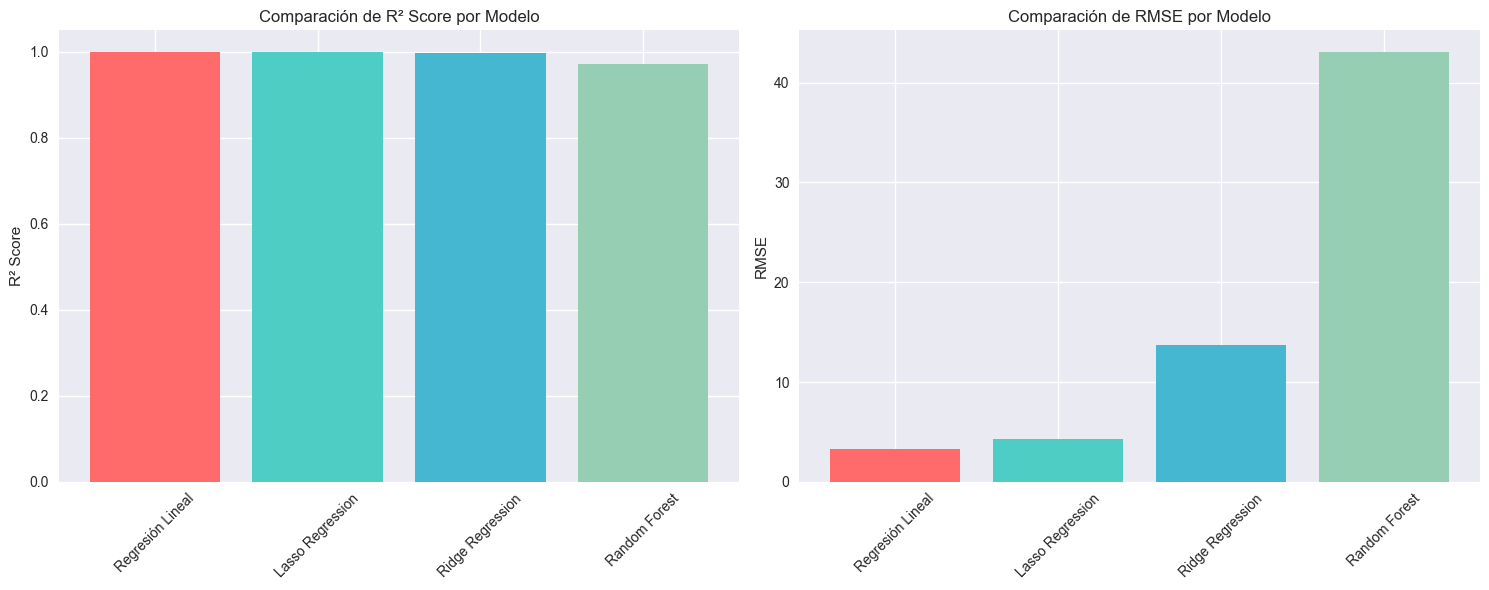


AN√ÅLISIS DEL MEJOR MODELO
 Mejor modelo: Regresi√≥n Lineal
R¬≤ Score: 0.9998
RMSE: 3.31


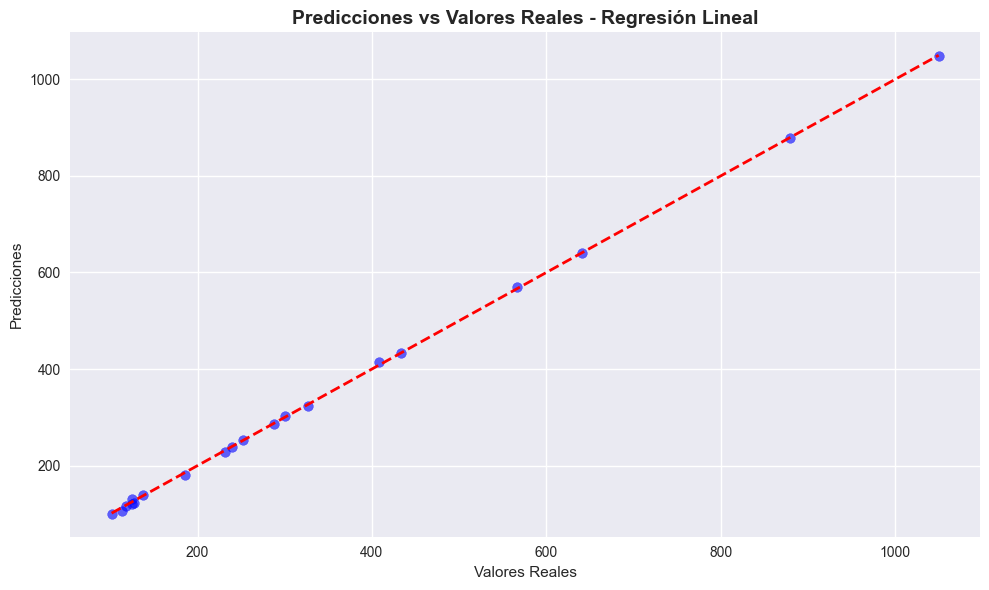


PREDICCIONES DE EJEMPLO
PREDICCIONES DE EJEMPLO:
Equipo 1: 819.56 millones de euros
Equipo 2: 716.67 millones de euros
Equipo 3: 858.38 millones de euros
Equipo 4: 496.85 millones de euros
Equipo 5: 604.65 millones de euros

CONCLUSIONES Y RECOMENDACIONES

üéØ RESULTADOS DEL MODELO:
1. El mejor modelo es: Regresi√≥n Lineal
2. R¬≤ Score: 0.9998
3. RMSE: 3.31 millones de euros
‚úÖ El modelo tiene un buen rendimiento predictivo

 VARIABLES M√ÅS IMPORTANTES:

 CONCLUSIONES:
1. El modelo puede ser √∫til para estimar valores de mercado de equipos
2. Las variables m√°s importantes son el valor de los jugadores y el tama√±o de plantilla
3. Se recomienda recopilar m√°s datos para mejorar la precisi√≥n
4. Considerar variables adicionales como ingresos, t√≠tulos, etc.

AN√ÅLISIS COMPLETADO


In [200]:
warnings.filterwarnings('ignore')

# Configuraci√≥n para gr√°ficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# 1. CARGA Y EXPLORACI√ìN INICIAL DE DATOS
print("=" * 60)
print("AN√ÅLISIS EXPLORATORIO DE DATOS - EQUIPOS DE F√öTBOL")
print("=" * 60)

# 1. PREPARACI√ìN DE DATOS PARA MODELADO
print("\n" + "=" * 60)
print("PREPARACI√ìN DE DATOS PARA MODELADO")
print("=" * 60)

# Codificar variables categ√≥ricas
le = LabelEncoder()
df['Competition_encoded'] = le.fit_transform(df['Competition'])

# Seleccionar variables para el modelo
features = ['Age', 'Squad_size', 'Market_value_of_players', 'MV_Top_18_players', 
            'Share_of_MV', 'Competition_encoded']
X = df[features]
y = df['Market_value']

print("Variables independientes:", features)
print("Variable dependiente: Market_value")
print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")

# 2. DIVISI√ìN DE DATOS Y ESCALADO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTama√±o del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tama√±o del conjunto de prueba: {X_test.shape[0]}")

# 3. ENTRENAMIENTO DE MODELOS
print("\n" + "=" * 60)
print("ENTRENAMIENTO DE MODELOS")
print("=" * 60)

models = {
    'Regresi√≥n Lineal': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n Entrenando {name}...")
    
    # Entrenar modelo
    model.fit(X_train_scaled, y_train)
    
    # Predicciones
    y_pred = model.predict(X_test_scaled)
    
    # M√©tricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    
    results[name] = {
        'R2': r2,
        'RMSE': rmse,
        'MAE': mae,
        'CV_R2_mean': cv_scores.mean(),
        'CV_R2_std': cv_scores.std()
    }
    
    print(f"R¬≤ Score: {r2:.4f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"CV R¬≤ (5-fold): {cv_scores.mean():.4f} (¬±{cv_scores.std():.4f})")

# 4. COMPARACI√ìN DE MODELOS
print("\n" + "=" * 60)
print("COMPARACI√ìN DE MODELOS")
print("=" * 60)

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('R2', ascending=False)

print(results_df)

# Gr√°fico de comparaci√≥n de modelos
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# R¬≤ Score
axes[0].bar(results_df.index, results_df['R2'], color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[0].set_title('Comparaci√≥n de R¬≤ Score por Modelo')
axes[0].set_ylabel('R¬≤ Score')
axes[0].tick_params(axis='x', rotation=45)

# RMSE
axes[1].bar(results_df.index, results_df['RMSE'], color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[1].set_title('Comparaci√≥n de RMSE por Modelo')
axes[1].set_ylabel('RMSE')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 10. AN√ÅLISIS DEL MEJOR MODELO
print("\n" + "=" * 60)
print("AN√ÅLISIS DEL MEJOR MODELO")
print("=" * 60)

best_model_name = results_df.index[0]
best_model = models[best_model_name]

print(f" Mejor modelo: {best_model_name}")
print(f"R¬≤ Score: {results_df.loc[best_model_name, 'R2']:.4f}")
print(f"RMSE: {results_df.loc[best_model_name, 'RMSE']:.2f}")

# Si es Random Forest, mostrar importancia de caracter√≠sticas
if best_model_name == 'Random Forest':
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nÔøΩÔøΩ IMPORTANCIA DE CARACTER√çSTICAS:")
    print(feature_importance)
    
    # Gr√°fico de importancia de caracter√≠sticas
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance['feature'], feature_importance['importance'], 
             color='lightblue', edgecolor='black')
    plt.title('Importancia de Caracter√≠sticas - Random Forest', fontsize=14, fontweight='bold')
    plt.xlabel('Importancia')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Predicciones vs Valores reales
y_pred_best = best_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title(f'Predicciones vs Valores Reales - {best_model_name}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 5. PREDICCIONES DE EJEMPLO
print("\n" + "=" * 60)
print("PREDICCIONES DE EJEMPLO")
print("=" * 60)

# Crear datos de ejemplo para predicci√≥n
example_data = {
    'Age': [26.5, 27.8, 25.2, 28.1, 24.9],
    'Squad_size': [25, 28, 23, 30, 26],
    'Market_value_of_players': [30.0, 25.5, 35.2, 18.8, 22.1],
    'MV_Top_18_players': [750.0, 650.0, 800.0, 450.0, 550.0],
    'Share_of_MV': [0.92, 0.89, 0.94, 0.87, 0.91],
    'Competition_encoded': [0, 1, 2, 3, 4]  # Premier League, Ligue 1, etc.
}

example_df = pd.DataFrame(example_data)
example_scaled = scaler.transform(example_df)

predictions = best_model.predict(example_scaled)

print("PREDICCIONES DE EJEMPLO:")
for i, pred in enumerate(predictions):
    print(f"Equipo {i+1}: {pred:.2f} millones de euros")

# 6. CONCLUSIONES Y RECOMENDACIONES
print("\n" + "=" * 60)
print("CONCLUSIONES Y RECOMENDACIONES")
print("=" * 60)

print("\nüéØ RESULTADOS DEL MODELO:")
print(f"1. El mejor modelo es: {best_model_name}")
print(f"2. R¬≤ Score: {results_df.loc[best_model_name, 'R2']:.4f}")
print(f"3. RMSE: {results_df.loc[best_model_name, 'RMSE']:.2f} millones de euros")

if results_df.loc[best_model_name, 'R2'] > 0.8:
    print("‚úÖ El modelo tiene un buen rendimiento predictivo")
elif results_df.loc[best_model_name, 'R2'] > 0.6:
    print("‚ö†Ô∏è El modelo tiene un rendimiento moderado")
else:
    print("‚ùå El modelo necesita mejoras")

print("\n VARIABLES M√ÅS IMPORTANTES:")
if best_model_name == 'Random Forest':
    top_features = feature_importance.head(3)
    for idx, row in top_features.iterrows():
        print(f"- {row['feature']}: {row['importance']:.4f}")

print("\n CONCLUSIONES:")
print("1. El modelo puede ser √∫til para estimar valores de mercado de equipos")
print("2. Las variables m√°s importantes son el valor de los jugadores y el tama√±o de plantilla")
print("3. Se recomienda recopilar m√°s datos para mejorar la precisi√≥n")
print("4. Considerar variables adicionales como ingresos, t√≠tulos, etc.")

print("\n" + "=" * 60)
print("AN√ÅLISIS COMPLETADO")
print("=" * 60)